## Training Project 01 - EDA - Titanic Kaggle Challange

Download csv file from https://www.kaggle.com/c/titanic/data?select=train.csv

### Project Objectives

Identify factors that are correlated with survival rate.

Some hypotesis to investigate:

1.   "Women and children first" is an unwritten rule in our society, meaning these subgroups should be given priority on situations like the Titanic tragedy and thus would have higher survival rates then adult males
2.   Money usually gives you an advantage in most situatinons in life, did the passengers of the first class have higher survival rates then passengers of the second and third classes?


In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('C:/Users/Guilherme/Google Drive/Estudo/Phyton/Bases/titanic_kaggle.csv')

First, lats get some overview on the data:

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can identify that the Cabin feature has most of its rows missing, so we won´t be able to use it in our model and this feature will be droped.
The Age and Embarked features have some missing values but still enough to remain in our analysis (>75%).


In [ ]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# check for duplicated observations
titanic_df['PassengerId'].duplicated().sum()

0

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table above we can see that the survival rate of the passengers was around 38%.

### Part 1 - Who were the Titanic passengers?

First, let´s take a look at the Sex and Class distribution of the passengers on our data sample.

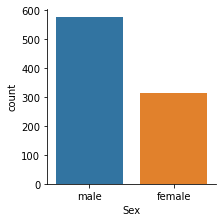

In [ ]:
# number of passengers by sex
sns.catplot(x="Sex", kind="count", data=titanic_df, height=3)

In [ ]:
# % of passengers by sex
titanic_df['Sex'].value_counts(normalize=True).round(2)

male      0.65
female    0.35
Name: Sex, dtype: float64

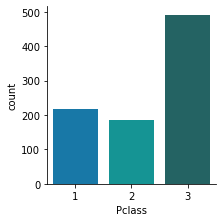

In [ ]:
# number of passengers by class
sns.catplot(x="Pclass", kind="count", data=titanic_df, height=3, palette="winter_d")

In [ ]:
# % of passengers by sex
titanic_df['Pclass'].value_counts(normalize=True, sort=False).round(2)

1    0.24
2    0.21
3    0.55
Name: Pclass, dtype: float64

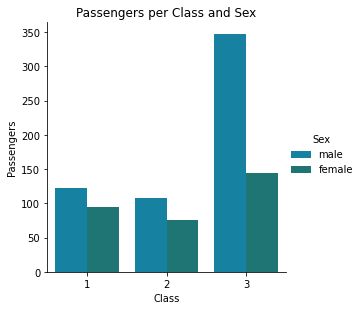

In [ ]:
# number of passengers by sex and class
fig = sns.catplot(x="Pclass", kind="count", hue="Sex", data=titanic_df, height=4, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

In [ ]:
# % of passengers per Class and Sex
titanic_df[['Pclass', 'Sex','PassengerId']].groupby(['Pclass', 'Sex']).count()/titanic_df[['Pclass','PassengerId']].groupby(['Pclass']).count()

PassengerId
Pclass Sex                
1      female     0.435185
       male       0.564815
2      female     0.413043
       male       0.586957
3      female     0.293279
       male       0.706721

We can observe that the majority of the passengers were male (65% of total passengers) and from the third class (55% of total passengers);

Classes 1 and 2 are somewhat balanced regarding sex of the passengers, while the third class is composed mostly by males (70% of 3rd class passengers).

Next, let´s take a look on the Age distributions


<AxesSubplot:>

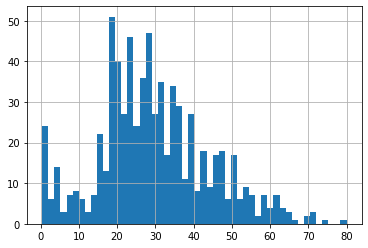

In [ ]:
# passengers age distribution
titanic_df['Age'].hist(bins=50)

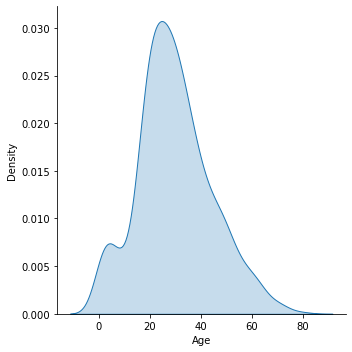

In [ ]:
# kernel curve of that distribution
sns.displot(titanic_df, x="Age", kind="kde", fill="True")

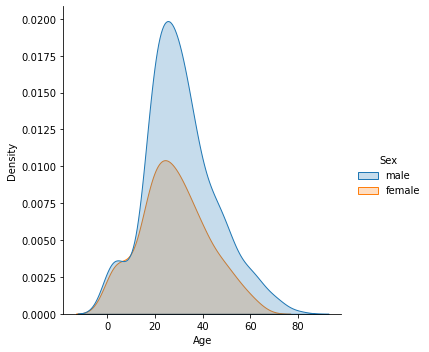

In [ ]:
# kernel curve by sex
sns.displot(titanic_df, x="Age", hue="Sex", kind="kde", fill="True")

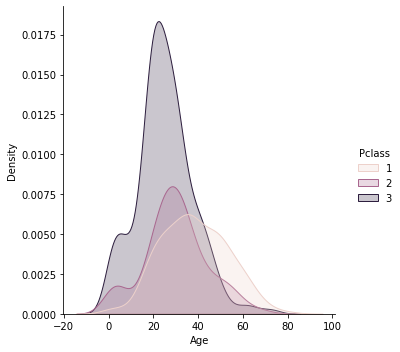

In [ ]:
# kernel curve by class
sns.displot(titanic_df, x="Age", hue="Pclass", kind="kde", fill="True")

Analysing the frequency curves for the passenger's age it apears we have two distinct groups with different distributions, one centered between 0-10 years old and the other centered between 20-30 years old. Considering that one of our initial hypotesis is that children had higher survival rates then adults, it makes sence model our data to separete the children from the rest of the passengers.

In [ ]:
# create a new column mapping passengers younger then 15 years into the "child" category
titanic_df.loc[titanic_df['Age'] < 15, 'Person'] = "child"
titanic_df.loc[(titanic_df['Age'] >= 15) & (titanic_df['Sex'] == 'female'), 'Person'] = "female"
titanic_df.loc[(titanic_df['Age'] >= 15) & (titanic_df['Sex'] == 'male'), 'Person'] = "male"
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child


In [ ]:
# check if it worked
titanic_df['Person'].unique()

array(['male', 'female', nan, 'child'], dtype=object)

We got a few NaN values due to age missing on a few passenger records.

In [ ]:
# how many passengers in each category?
titanic_df['Person'].value_counts()

male      414
female    222
child      78
Name: Person, dtype: int64

In [ ]:
# % of each category of the total passengers
titanic_df['Person'].value_counts(normalize=True).round(2)

male      0.58
female    0.31
child     0.11
Name: Person, dtype: float64

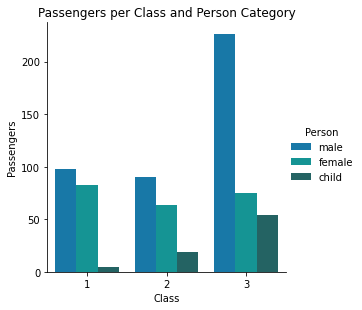

In [ ]:
# number of passengers per class and person category
fig = sns.catplot(x="Pclass", kind="count", hue="Person", data=titanic_df, height=4, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Person Category")
plt.show(fig)

The majority of the children were on the 3rd class.

How many of these passengers were alone and how many were with family? We need to model our data and create a column to show that.

In [ ]:
# if columns SibSp or Parch >0 then the passanger had family onboard

Family_size = titanic_df.SibSp + titanic_df.Parch
titanic_df.loc[Family_size == 0, 'Family'] = "Alone"
titanic_df.loc[Family_size > 0, 'Family'] = "With Family"
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,NaN,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,With Family


In [ ]:
# check if it worked
titanic_df['Family'].unique()

array(['With Family', 'Alone'], dtype=object)

In [ ]:
# % of passengers alone or with family
titanic_df['Family'].value_counts(normalize=True).round(2)

Alone          0.6
With Family    0.4
Name: Family, dtype: float64

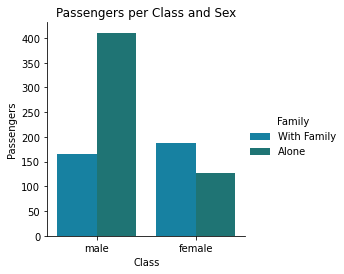

In [ ]:
# number of passengers alone or with family by sex
fig = sns.catplot(x="Sex", kind="count", hue="Family", data=titanic_df, height=3.5, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

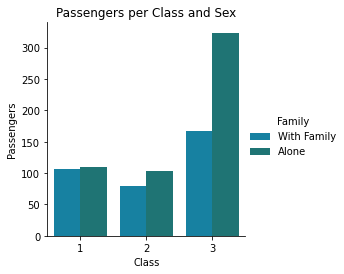

In [ ]:
# number of passengers alone or with family by class
fig = sns.catplot(x="Pclass", kind="count", hue="Family", data=titanic_df, height=3.5, palette="winter_d")
plt.xlabel("Class")
plt.ylabel("Passengers")
plt.title("Passengers per Class and Sex")
plt.show(fig)

Most of the passengers (60%) were alone on the ship. The proportion of alone vs with family was higher among males and 3rd class passengers.

### Part 2 - Identify relevant features to predict Survival Rate

Now, let's analyse the correlation of the features with the survival rate.

In [ ]:
# survival rate of the sample data
titanic_df['Survived'].value_counts(normalize=True).round(2)

0    0.62
1    0.38
Name: Survived, dtype: float64

Most passengers did not survive, let´s start digging on the features that can help us predict survival rate.

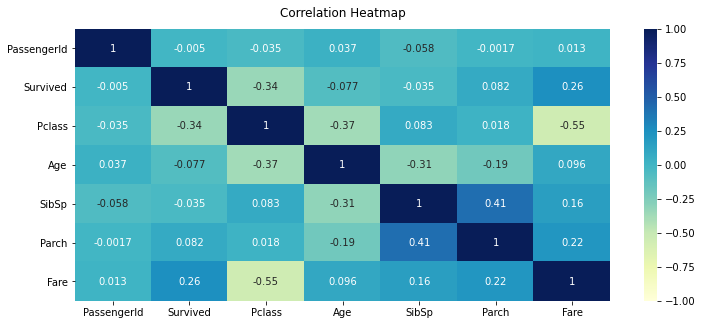

In [ ]:
# heatmap with the feature corelations

plt.figure(figsize=(12,5))
heatmap = sns.heatmap(titanic_df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From this heatmap we can identify a moderate negative correlation between Pclass and Survival Rate. There is also a negative correlation between Pclass and Fare, which makes sense since 1st class tickets are more expansive then 3rd class ones. There is also a significant correlation between the "family features" Parch and SibSp.

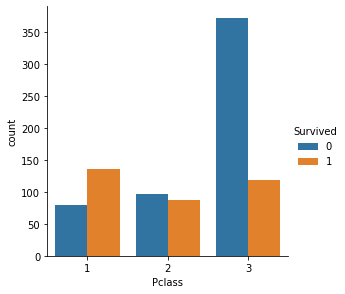

In [ ]:
# how many passengers survived or not by class?
sns.catplot(x='Pclass', kind='count', hue='Survived', height=4, data=titanic_df)

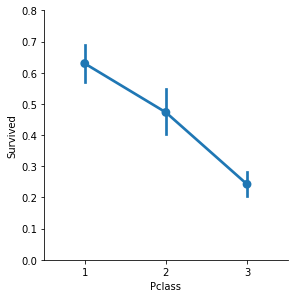

In [ ]:
# survival rate by class
sns.catplot(x="Pclass", y="Survived", kind="point", data=titanic_df, height=4).set(ylim=(0, 0.8))

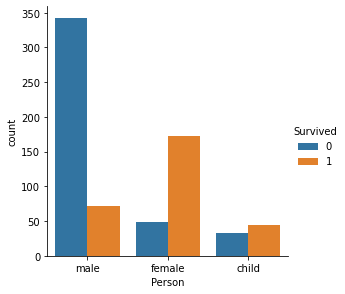

In [ ]:
# how many passengers survived or not by person category?
sns.catplot(x='Person', kind='count', hue='Survived', height=4, data=titanic_df)

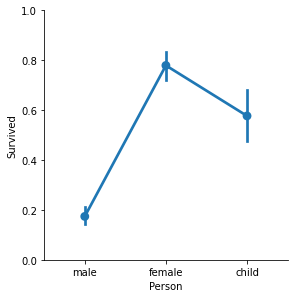

In [ ]:
# survival rate by person category

sns.catplot(x="Person", y="Survived", kind="point", data=titanic_df, height=4)
plt.ylim(0, 1)
plt.show()

In [ ]:
# how many passengers survived or not by class and person category combination?
titanic_df.groupby(['Pclass', 'Person', 'Survived']).count()['PassengerId']

Pclass  Person  Survived
1       child   0             1
                1             4
        female  0             2
                1            81
        male    0            61
                1            37
2       child   1            19
        female  0             6
                1            58
        male    0            84
                1             6
3       child   0            32
                1            22
        female  0            41
                1            34
        male    0           197
                1            29
Name: PassengerId, dtype: int64

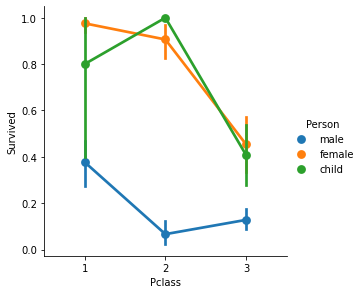

In [ ]:
# survival rate by class and person category combination. Note: Some of these groups have too little data points to calculate the confidence interval appropriatelly.
sns.catplot(x="Pclass", y="Survived", hue="Person", kind="point", data=titanic_df, height=4)

Analysing the data, we can basically divide the passengers into 3 clusters:

1 - High survival rate: Females and Children on 1st and 2nd class

2 - Medium survival rate: Females and Children on 3rd class and Males on 1st class

3 - Low survival rate: Males on 2nd and 3rd class


Let´s keep analysing the data to see if any other feature has strong correlation with the Survival Rate.

In [ ]:
# survival rate by family category

titanic_df[['Family', 'Survived']].groupby(['Family']).mean().round(2)

,Survived
Family,
Alone,0.30
With Family,0.51


Passengers with family had higher survival rate then passengers that were alone, but could this difference be explained by the Pclass or Person features? Let's check.

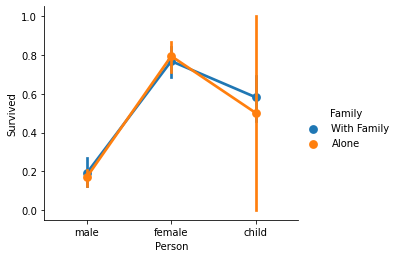

In [ ]:
# survival rate by person category and family category
sns.catplot(x="Person", y="Survived", kind="point", hue='Family', data=titanic_df, height=3.5, aspect=1.2)

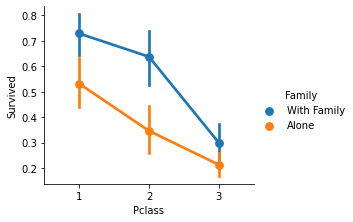

In [ ]:
# survival rate by class and family category
sns.catplot(x="Pclass", y="Survived", kind="point", hue='Family', data=titanic_df, height=3, aspect=1.2)

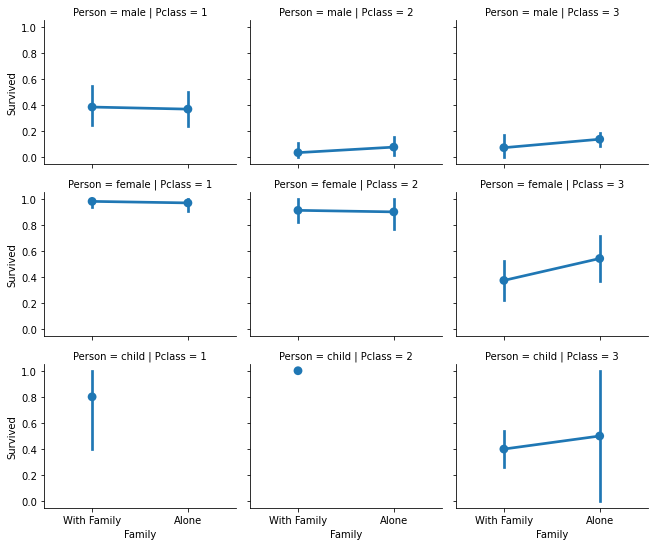

In [ ]:
# survival rate of alone vs with family, breaking down by class and person category
# Note, some of these groups have too little data points so we should be carefull when drawing conclusions from them
sns.catplot(x='Family', y='Survived', kind='point', col='Pclass', row='Person', data=titanic_df, height=2.5, aspect=1.2)

Looking at the graphs it does not appear to be any correlation between having *family* onboard and survival rate, once we control for Sex and Pclass. The only exception could be for 3rd class females, but from the graph the difference in means does not appear to be statistically significant.

Now, in addition to class, could the ticket fare help us predict survival rate?

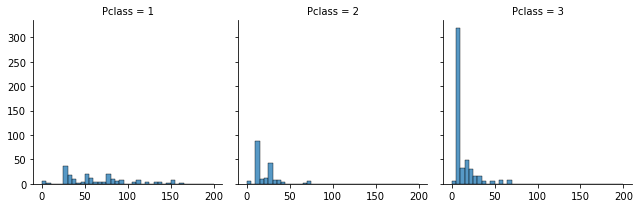

In [ ]:
# fare distribution by class

g = sns.FacetGrid(titanic_df, col="Pclass")
g.map_dataframe(sns.histplot, x="Fare", binwidth=5, binrange=(0, 200))

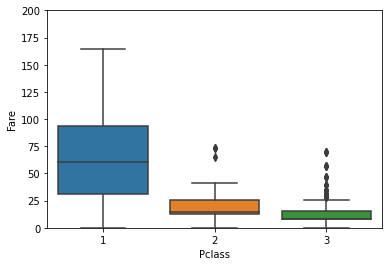

In [ ]:
# boxplot of fare by class

sns.boxplot(x='Pclass', y='Fare', data=titanic_df).set(ylim=(0, 200))
plt.show()

To make the analysis easier (and more robust to outliers) we can divide the fares into groups (Binning).

In [ ]:
# divide the fare column into 5 groups and check for survival rates

categorical_fare = pd.qcut(titanic_df['Fare'], 5)
titanic_df['Cat. Fare'] = categorical_fare
titanic_df[['Cat. Fare', 'Survived']].groupby(['Cat. Fare']).mean()

,Survived
Cat. Fare,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


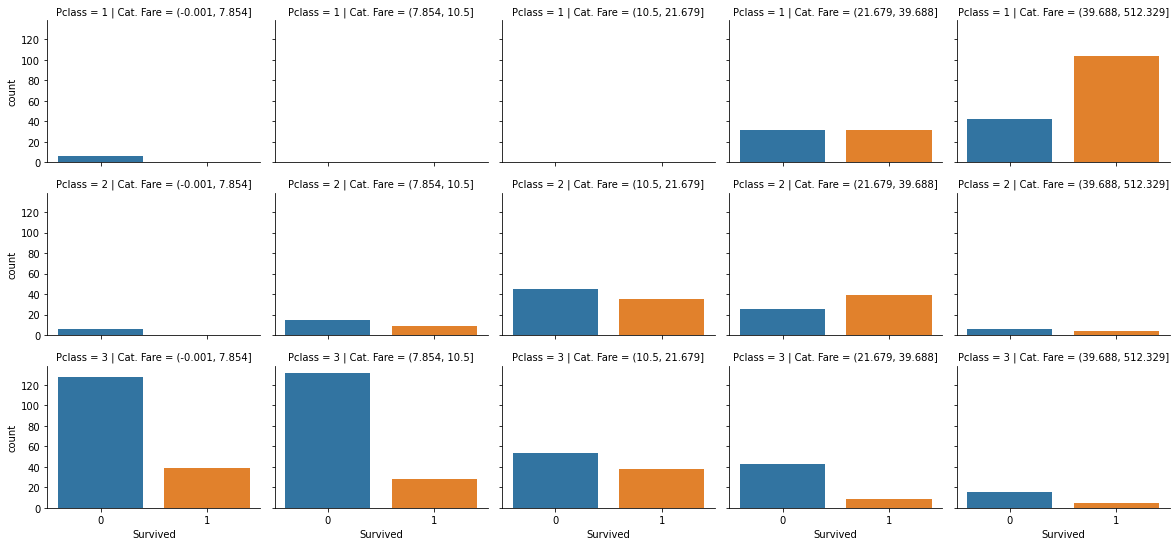

In [ ]:
# number of passengers by survival status by class and fare category

sns.catplot(x='Survived', kind='count', col='Cat. Fare', row='Pclass', data=titanic_df, height=2.5, aspect=1.3 )

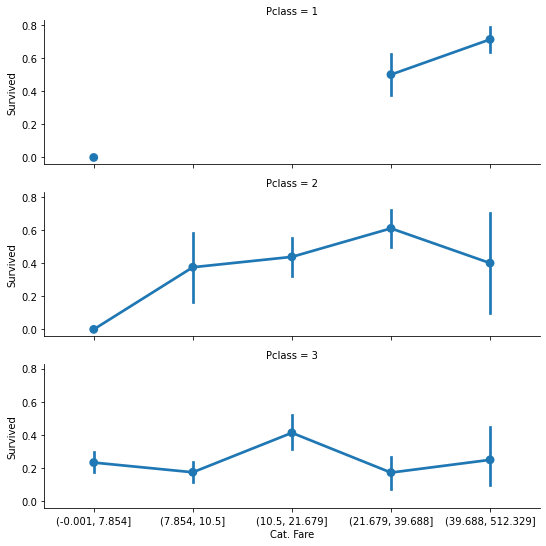

In [ ]:
sns.catplot(x='Cat. Fare', y='Survived', kind='point', row='Pclass', data=titanic_df, height=2.5, aspect=3)

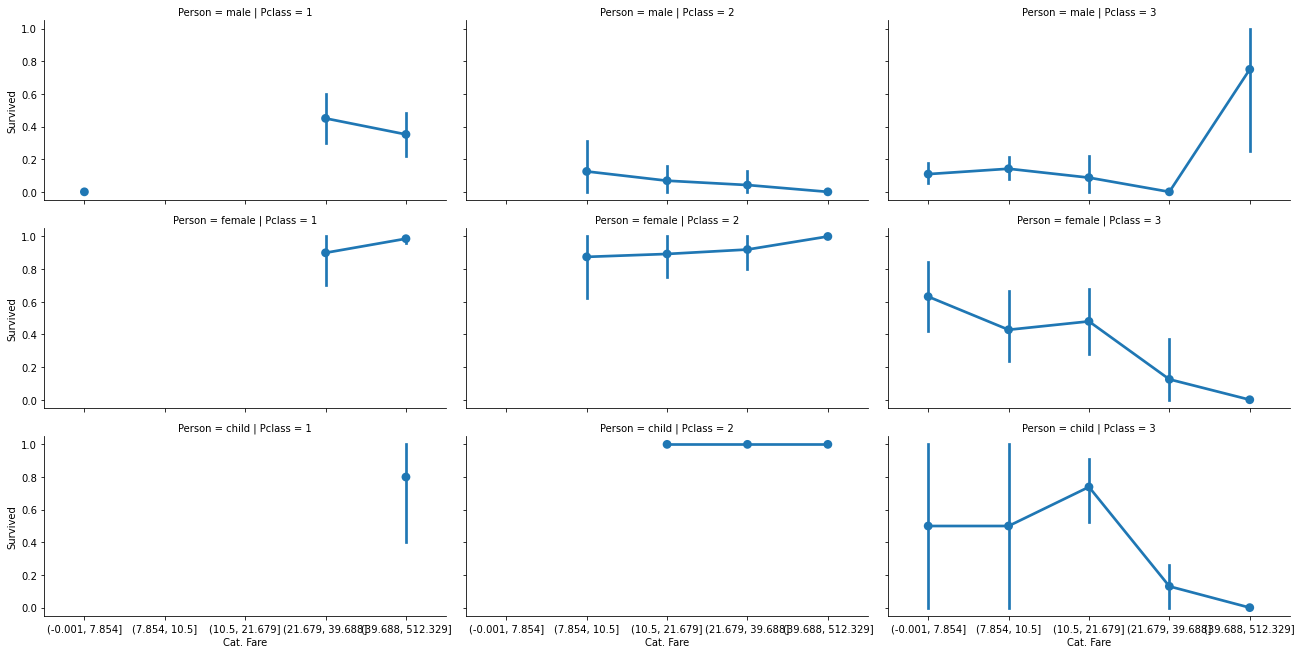

In [ ]:
sns.catplot(x='Cat. Fare', y='Survived', kind='point', col='Pclass', row='Person', data=titanic_df, height=3, aspect=2)

Looking at the graphs it does not appear to be any correlation between Fare prices and survival, once we control for Sex and Pclass.

Could embarked port be an important feature to our model?

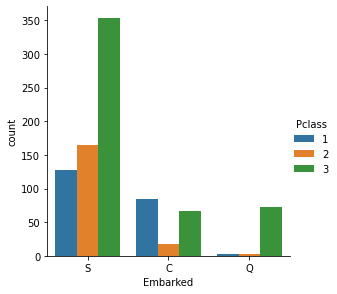

In [ ]:
# Where did the passengers from each class embarked from?
sns.catplot(x='Embarked', kind='count', hue='Pclass', data=titanic_df, height=4)

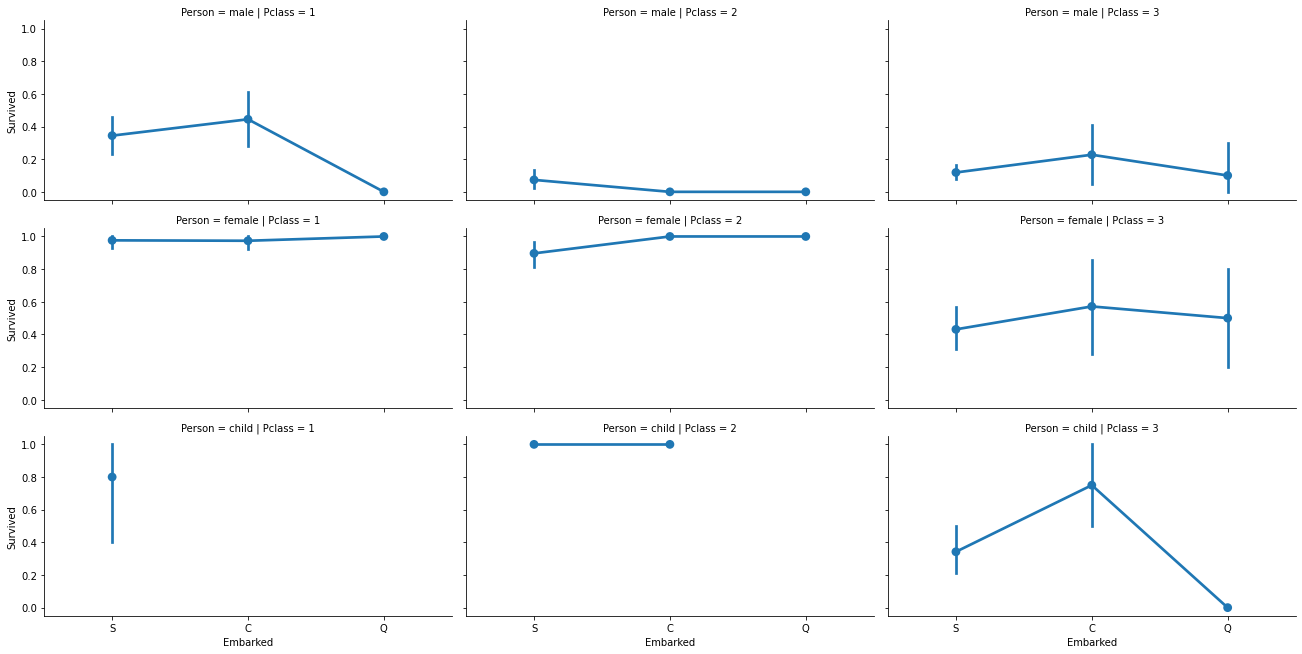

In [ ]:
# breaking down survival rate from each port embarked by class and sex
sns.catplot(x='Embarked', y='Survived', kind='point', col='Pclass', row='Person', data=titanic_df, height=3, aspect=2)

Looking at the graphs it does not appear to be any correlation between Fare prices and survival, once we control for Sex and Pclass. Next, we will check if age is an important factor in predicting survival rate.

<AxesSubplot:xlabel='Age', ylabel='Count'>

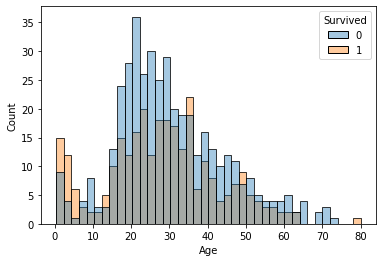

In [ ]:
# age distributions of passengers

sns.histplot(data=titanic_df, x='Age', hue='Survived', alpha=0.4, bins=40)

In [ ]:
# to help our analysis, let's divide the ages into bins

bins = [0,14,24,34,54,100]
groups = ['Child','Youg Adult','Adult','Older Adult', 'Elder']

titanic_df['Age Range'] = pd.cut(titanic_df['Age'], bins=bins, labels=groups)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Family,Cat. Fare,Age Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,"(-0.001, 7.854]",Youg Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,"(39.688, 512.329]",Older Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,"(7.854, 10.5]",Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,"(39.688, 512.329]",Older Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,"(7.854, 10.5]",Older Adult


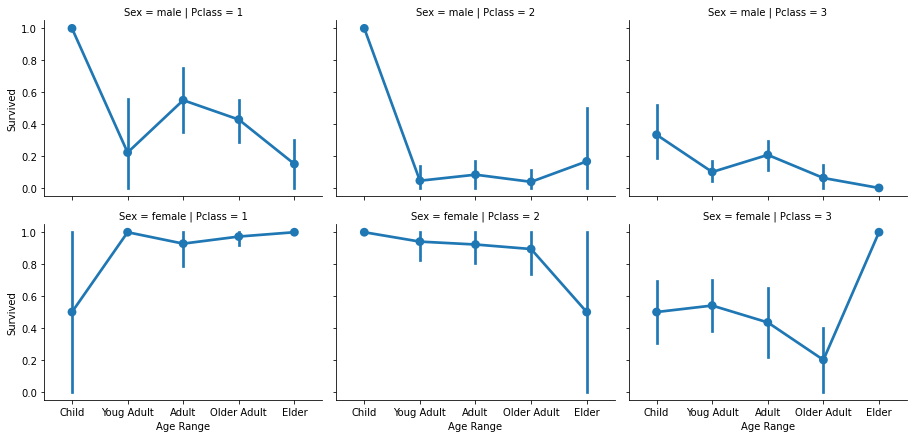

In [ ]:
# comparing survival rate of age bin by class and sex

sns.catplot(x='Age Range', y='Survived', kind='point', col='Pclass', row='Sex', data=titanic_df.sort_values(by=['Age'],ascending=True), height=3, aspect=1.4)

Apart from the noted difference between children and adults, there was no observed correlation between age and survival rate once we control for Sex and Pclass.

### Conclusions

After analysing the data, we identified that the features most strongly correlated with survival rate are Person and Pclass.

During the analysis we were able to divide the passengers into 3 clusters:

1 - High survival rate: Females and Children on 1st and 2nd class

2 - Medium survival rate: Females and Children on 3rd class and Males on 1st class

3 - Low survival rate: Males on 2nd and 3rd class

